In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [2]:
state0 = xr.open_dataset('/Users/weiyangbao/Desktop/sill10/state_001.nc')
#state0 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/sill30/state_004.nc')
t0 = 60 # Start from day 30
tn = len(state0.T) # End day
state = state0.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction


In [3]:
xloc = 28 # Location in x-axsis 0~50, sill:28

depth = state.Z.data
pt = state.Temp.isel(X = xloc).data # dims = T, Z, Y
s = state.S.isel(X = xloc).data
u = state.U.data # dims = T, Z, Y, Xp1

# Mean value in Y direction, boundaries removed
pt_tmean = pt.mean(2).mean(0) # Time averaged profiles in z direction
s_tmean = s.mean(2).mean(0)
u_ymean = (u[:, :, :, 1:].mean(2) + u[:, :, :, :-1].mean(2)) / 2
u_tmean = u_ymean[:, :, xloc].mean(0)
mask = (pt_tmean == 0)
pt_tmean[mask] = np.nan
s_tmean[mask] = np.nan
u_tmean[mask] = np.nan
depth

array([  -0.25,   -0.75,   -1.25,   -1.75,   -2.25,   -2.75,   -3.25,
         -3.75,   -4.25,   -4.75,   -5.5 ,   -6.5 ,   -7.5 ,   -8.5 ,
         -9.5 ,  -10.5 ,  -11.5 ,  -12.5 ,  -13.5 ,  -14.5 ,  -15.75,
        -17.25,  -18.75,  -20.25,  -21.75,  -23.25,  -24.75,  -26.25,
        -27.75,  -29.25,  -32.  ,  -36.  ,  -40.  ,  -44.  ,  -48.  ,
        -52.  ,  -56.  ,  -60.  ,  -64.  ,  -68.  ,  -74.  ,  -82.  ,
        -90.  ,  -98.  , -106.  , -114.  , -122.  , -130.  , -138.  ,
       -146.  ])

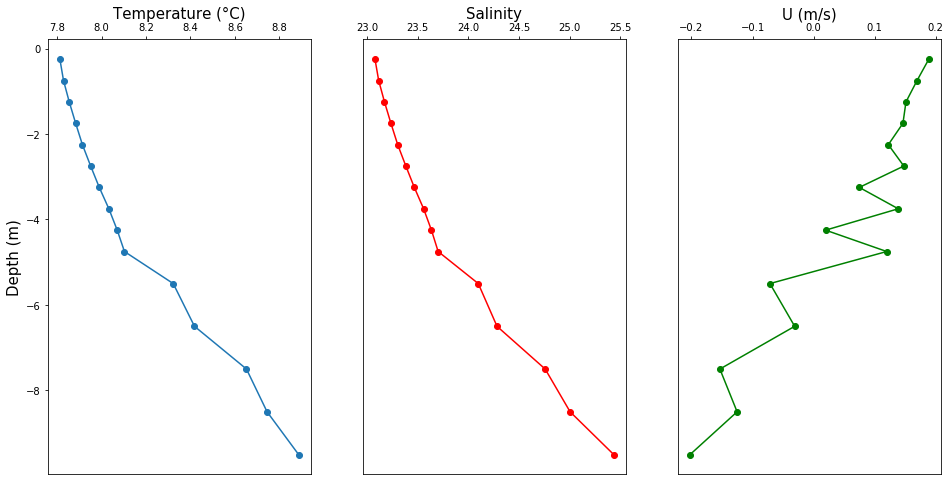

In [4]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill010/TSUprof/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/TSUprof/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# Three-panel plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(16,8))
# Temperature
ax1.plot(pt_tmean,depth,'o-')
ax1.set_ylabel('Depth (m)',size = 15)
#ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (\N{DEGREE SIGN}C)', size = 15)
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity
ax2.plot(s_tmean,depth,'o-r')
ax2.set_xlabel('Salinity', size = 15)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks
# Horizontal velocity
ax3.plot(u_tmean,depth,'o-g')
ax3.set_xlabel('U (m/s)', size = 15)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks
#plt.close()
fig.savefig(fig_path + '/q100.png', dpi = 150, bbox_inches='tight')